In [5]:
# Logistical Regression

# features (numerical)
# variance of img wavelet
# assymetry of img wavelet
# sharpness of img wavelet
# image entropy (measure of randomness of img texture)

# label (binary)
# 0: real bank note, 1: fake bank note 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

data = pd.read_csv('currency.txt', header=None)
data.columns = ['img_var', 'img_skew', 'img_curt', 'img_entr', 'auth']
print(data.tail(10))

      img_var  img_skew   img_curt  img_entr  auth
1362 -2.16680   1.59330   0.045122  -1.67800     1
1363 -1.16670  -1.42370   2.924100   0.66119     1
1364 -2.83910  -6.63000  10.484900  -0.42113     1
1365 -4.50460  -5.81260  10.886700  -0.52846     1
1366 -2.41000   3.74330  -0.402150  -1.29530     1
1367  0.40614   1.34920  -1.450100  -0.55949     1
1368 -1.38870  -4.87730   6.477400   0.34179     1
1369 -3.75030 -13.45860  17.593200  -2.77710     1
1370 -3.56370  -8.38270  12.393000  -1.28230     1
1371 -2.54190  -0.65804   2.684200   1.19520     1


In [6]:
len(data.index)

1372

In [7]:
print(data.info)

<bound method DataFrame.info of       img_var  img_skew  img_curt  img_entr  auth
0     3.62160   8.66610   -2.8073  -0.44699     0
1     4.54590   8.16740   -2.4586  -1.46210     0
2     3.86600  -2.63830    1.9242   0.10645     0
3     3.45660   9.52280   -4.0112  -3.59440     0
4     0.32924  -4.45520    4.5718  -0.98880     0
...       ...       ...       ...       ...   ...
1367  0.40614   1.34920   -1.4501  -0.55949     1
1368 -1.38870  -4.87730    6.4774   0.34179     1
1369 -3.75030 -13.45860   17.5932  -2.77710     1
1370 -3.56370  -8.38270   12.3930  -1.28230     1
1371 -2.54190  -0.65804    2.6842   1.19520     1

[1372 rows x 5 columns]>


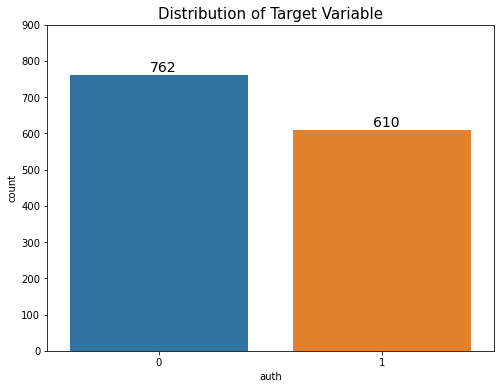

In [8]:

plt.figure(figsize=(8,6))
plt.title('Distribution of Target Variable', size=15)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [9]:
# data is not evenly distributed 
# random undersampling to remove random 152 instances from classification 0

nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


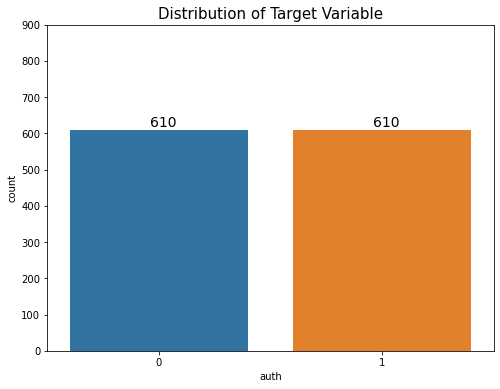

In [10]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target Variable', size=15)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [45]:
# separate features and target to x and y respectively 
# split feature data for test and train 

x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
# initialize scalar fit to standardize data 

scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [47]:
# initialize logistic regtession 

clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [48]:
print (f'X_train: {x_train.shape} \nX_test: {x_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (1097, 4) 
X_test: (275, 4) 
y_train: (1097, 1) 
y_test: (275, 1)


In [49]:
# Confusion Matrix and accuracy, f1, precision, recall of model 
from sklearn.metrics import f1_score

y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred Negative", "Pred Positive"],
                        index=['True Negative', "True Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 3)
precision = round((tp)/(tp+fp),3)
recall = round((tp)/(tp+fn),4)
f1 = round(f1_score(y_test,y_pred),3)
print(conf_mat)
print(f'\n Accuracy =', accuracy)
print(f'\n Precision =', precision)
print(f'\n Recall =', recall)
print(f'\n F1 Score =', f1)

               Pred Negative  Pred Positive
True Negative            145              3
True Positive              0            127

 Accuracy = 0.989

 Precision = 0.977

 Recall = 1.0

 F1 Score = 0.988


In [50]:
# simulating new data 
# returns predicted class, and determination of probability for belonging to each class 

new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.65791575 0.34208425]


In [51]:
new_banknote = np.array([3.2, -2.4, 5.8, -3.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [9.99262446e-01 7.37553815e-04]


In [52]:
new_banknote = np.array([1.5, -6.1, 4.4, 6.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class1
Probability [0/1]:  [0.23646291 0.76353709]


In [53]:
new_banknote = np.array([0.5, -5.7, 2.2, 5.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class1
Probability [0/1]:  [0.01007083 0.98992917]
